In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [15]:
mortgage_path = "Input_Files/Mortgage_Rates-Annual.csv"
all_houses_path = "Input_Files/All_House_Sale_Price-Annual.csv"
income_path = "Input_Files/Median_Household_Income-Annual.csv"

mortgage_data = pd.read_csv(mortgage_path)
all_houses = pd.read_csv(all_houses_path)
income = pd.read_csv(income_path)

In [16]:
mortgage_data.head()


,DATE,MORTGAGE30US
0,1971-01-01,7.5417500000000000
1,1972-01-01,7.3832692307692308
2,1973-01-01,8.0448076923076923
3,1974-01-01,9.1871153846153846
4,1975-01-01,9.0471153846153846


In [17]:
all_houses.head()

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0


In [18]:
income.head()

,DATE,MEHOINUSA672N
0,1984-01-01,55828
1,1985-01-01,56871
2,1986-01-01,58920
3,1987-01-01,59624
4,1988-01-01,60115


In [20]:
merge_data = pd.merge(pd.merge(all_houses, mortgage_data, on="DATE"),income,on="DATE")
merge_data.head()

,DATE,MSPUS,MORTGAGE30US,MEHOINUSA672N
0,1984-01-01,78200.0,13.8776923076923077,55828
1,1985-01-01,82800.0,12.4301923076923077,56871
2,1986-01-01,88000.0,10.1873076923076923,58920
3,1987-01-01,97900.0,10.2133962264150943,59624
4,1988-01-01,110000.0,10.3417307692307692,60115


In [21]:
merge_data.count()

DATE             38
MSPUS            38
MORTGAGE30US     38
MEHOINUSA672N    38
dtype: int64

In [25]:
merge_data = merge_data.rename(columns={"DATE" : "Date" , "MSPUS" : "Median Home Sale Price" , "MORTGAGE30US" : "Mortgage Rate", "MEHOINUSA672N" : "Median Household Income"}) 
merge_data.head()

,Date,Median Home Sale Price,Mortgage Rate,Median Household Income
0,1984-01-01,78200.0,13.8776923076923077,55828
1,1985-01-01,82800.0,12.4301923076923077,56871
2,1986-01-01,88000.0,10.1873076923076923,58920
3,1987-01-01,97900.0,10.2133962264150943,59624
4,1988-01-01,110000.0,10.3417307692307692,60115


In [26]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     38 non-null     object 
 1   Median Home Sale Price   38 non-null     float64
 2   Mortgage Rate            38 non-null     object 
 3   Median Household Income  38 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ KB


In [34]:
merge_data['Date'] = merge_data['Date'].astype('datetime64[D]')
merge_data['Median Household Income'] = merge_data['Median Household Income'].astype(float)
merge_data['Mortgage Rate'] = merge_data['Mortgage Rate'].astype(float)
merge_data['Mortgage Rate'] = merge_data['Mortgage Rate'].round(2)
merge_data.tail()

,Date,Median Home Sale Price,Mortgage Rate,Median Household Income
33,2017-01-01,313100.0,3.99,67571.0
34,2018-01-01,331800.0,4.54,68168.0
35,2019-01-01,313000.0,3.94,72808.0
36,2020-01-01,329000.0,3.11,71186.0
37,2021-01-01,369800.0,2.96,70784.0


In [35]:
time = merge_data["Date"]
home_price = merge_data["Median Home Sale Price"]
income_data = merge_data["Median Household Income"]
mortgage_data = merge_data["Mortgage Rate"]

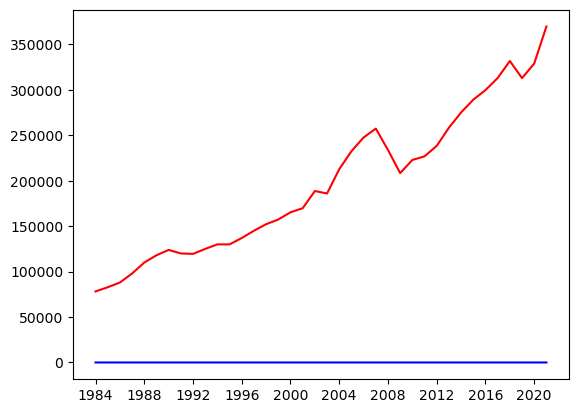

In [36]:
homes, = plt.plot(time, home_price, color="red", label="Median Home Sales Price")
mortgage_rate, = plt.plot(time, mortgage_data, color="blue", label="Mortgage Rate")
plt.show()

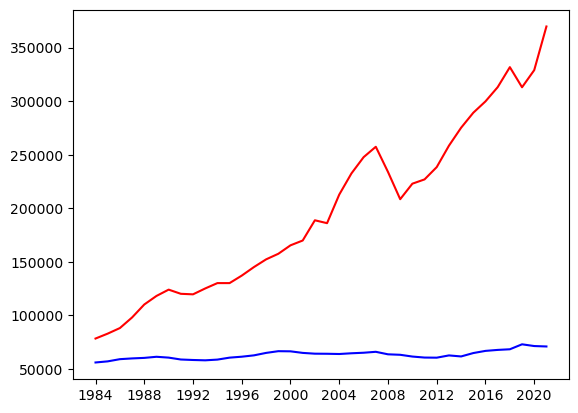

In [33]:
homes, = plt.plot(time, home_price, color="red", label="Median Home Sales Price")
income, = plt.plot(time, income_data, color="blue", label="Median Household Income")
plt.show()

In [31]:
time = np.arange(0,210,1)
x_axis = new_merge["Median Home Sale Price"]
y_axis = new_merge["Mortgage Rate"]

fig1, ax1 = plt.subplots()
plt.title('Mortgage Rates vs Home Sale Price')
plt.plot(x_axis, y_axis)
plt.xlabel('Median Home Sale Price (Dollars)')
plt.ylabel('Mortgage Rate (%)')
plt.show()

KeyError: 'Median Home Sale Price'